## Worker Dicisions
In this notebook, we will see how the good behavior of the worker will affect the increase of his inventory. we have considered the initial balance as 20 ether units. you can see the decision tree of the worker below:

![workerDecisions.jpg](../etc/img/WorkerDecisions.jpg)

Good behavior is marked with green lines and bad behavior with red lines. variable *decisionProbability*
shows the possibility of good behavior from the worker


In [70]:
import random

def randomProperties(initialBalance):
  if initialBalance < 1:
    raise ValueError(initialBalance, "Arg must be grater than 1")
  r = random.randint(1, initialBalance)
  salary = max(r, initialBalance - r)
  rProof = min(r, initialBalance - r)
  wProof = random.randint(1, initialBalance)
  return salary, rProof, wProof


def calculateWorkerBalance(initialBalance, decisionProbability, rangeNumber):
  if decisionProbability < 0 or decisionProbability > 1:
    raise ValueError(decisionProbability, "Args must be between 0 and 1")
  else:
    result = 0
    for i in range(0, rangeNumber):
      rand = random.random()
      salary, requetserProofOfTrust, workerProofOfTrust = randomProperties(initialBalance)
      if rand <= decisionProbability:
        result = result + salary
      else:
        repaymentRate = (salary + (requetserProofOfTrust / 4)) / (salary + requetserProofOfTrust)
        result = result - (workerProofOfTrust * (1 - repaymentRate))
    return initialBalance + (result / rangeNumber)


Now in the code below, you can see that for the increase of good behavior from the worker, the balance of his wallet increases. Please note that we have considered the initial balance as 20 units.

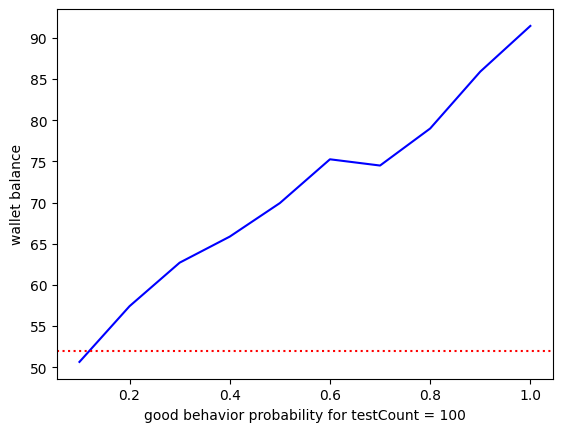

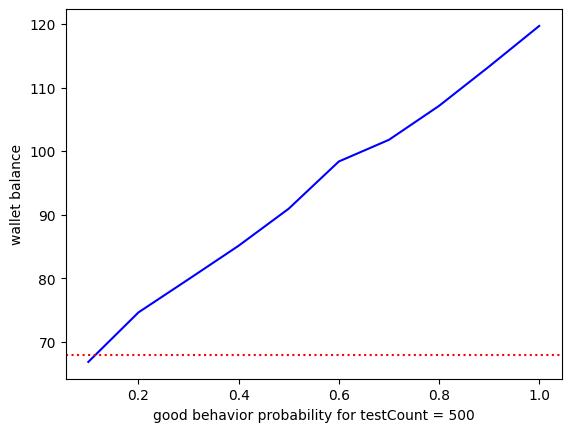

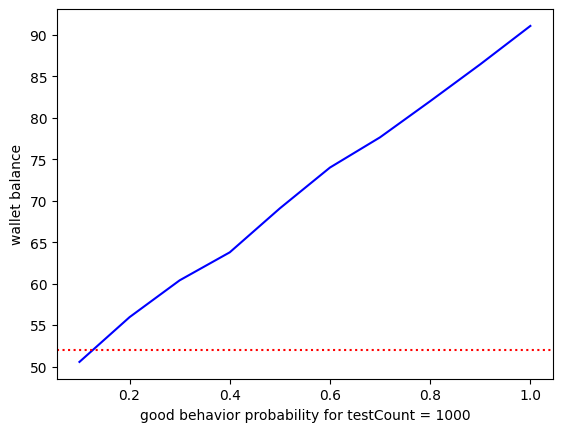

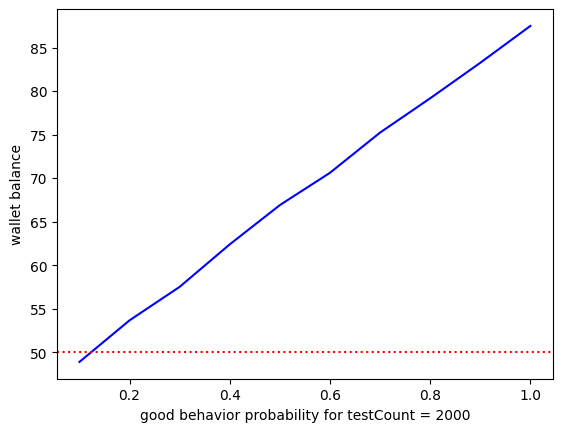

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import random

def showWorkerPlot(testCountPerProbability):
  workerInitialBalance = random.randint(30, 70)
  probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
  outputs = [calculateWorkerBalance(workerInitialBalance, i, testCountPerProbability) for i in probabilities]
  plt.plot(probabilities, outputs, 'b-')
  plt.axhline(y=workerInitialBalance, color='r', linestyle=':')
  plt.xlabel(f"good behavior probability for testCount = {testCountPerProbability}")
  plt.ylabel("wallet balance")
  plt.show()

showWorkerPlot(100)
showWorkerPlot(500)
showWorkerPlot(1000)
showWorkerPlot(2000)
